In [11]:
library("ggplot2")
library("directlabels")
library("ggrepel")

In [12]:
cwd = getwd()

threshold = "75"

data = read.csv(file=sprintf("%s/data/python_entropy_analysis/entropy_correlation_data_%sperc.csv", cwd,threshold))
data_df = data.frame(data)

In [13]:
data_df

X,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy,r
0,IC-01,0.7451684,Temporo-Limbic,IC-18,0.5909249,0.6153400
1,IC-02,0.6112560,Fronto-Striatal,IC-14,0.5808227,0.6151892
2,IC-03,0.7036485,Ventral Attention,IC-16,0.7721060,0.5234964
3,IC-11,0.5386594,Auditory,IC-07,0.4084267,0.5151314
4,IC-20,0.0000000,Medial Visual,IC-20,0.2717689,0.4819234
5,IC-09,0.5357182,Cognitive Control,IC-17,0.7083755,0.4161618
6,IC-12,0.7674083,Salience,IC-04,0.8210624,0.4313501
7,IC-07,0.4656765,R. Cent. Executive,IC-09,0.6671161,0.3885926
8,IC-16,0.7117750,L. Cent. Executive,IC-03,0.7165799,0.3359827
9,IC-05,0.5869786,Pulvinar (Thal.),IC-06,0.5876466,0.5447756



Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17514 -0.07436 -0.02502  0.09444  0.15706 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)        0.25910    0.08499   3.049  0.00932 **
data_df$A.Entropy  0.60235    0.14748   4.084  0.00129 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1049 on 13 degrees of freedom
Multiple R-squared:  0.562,	Adjusted R-squared:  0.5283 
F-statistic: 16.68 on 1 and 13 DF,  p-value: 0.001291


[1] "P-Values of Coefficients"


(Intercept) data_df$A.Entropy 
     0.0046610468      0.0006454035

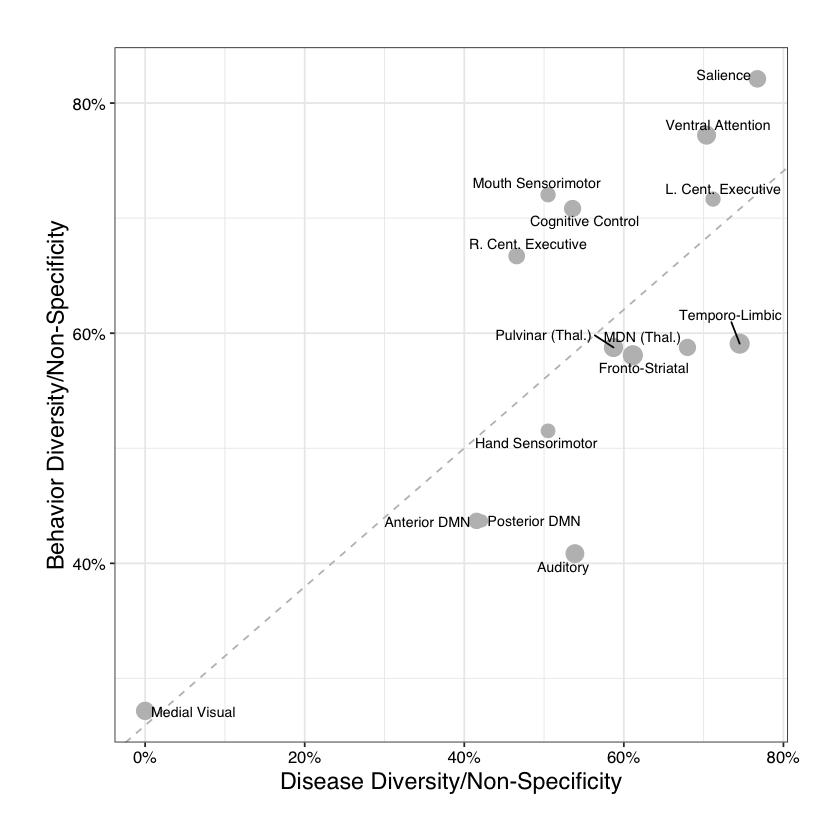

In [14]:
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(data_df, aes(A.Entropy,B.Entropy))

# plot linear model
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = data_df$r),colour="gray",show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=data_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("Behavior Diversity/Non-Specificity") +
    xlab("Disease Diversity/Non-Specificity") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    #scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    theme(plot.margin=unit(c(1,1.1,1,1),"cm")) + 
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica"))
  
p 

ggsave(sprintf("%s/figures/linear_model_%sperc.png",cwd,threshold), width = 4.5, height = 4, units = "in", dpi = 500)


Call:
lm(formula = data_df$B.Entropy ~ data_df$A.Entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16051 -0.05258 -0.03093  0.09098  0.17430 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)         0.2027     0.1492   1.359   0.2015  
data_df$A.Entropy   0.6800     0.2483   2.739   0.0193 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1062 on 11 degrees of freedom
Multiple R-squared:  0.4055,	Adjusted R-squared:  0.3514 
F-statistic: 7.502 on 1 and 11 DF,  p-value: 0.01927


[1] "P-Values of Coefficients"


(Intercept) data_df$A.Entropy 
      0.100732000       0.009632647

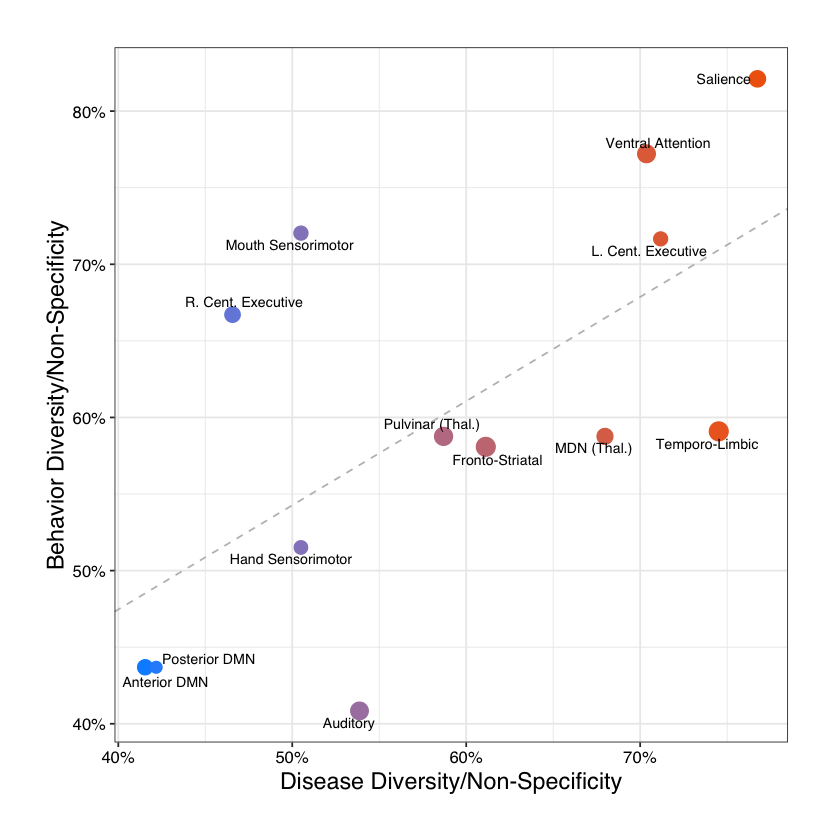

In [10]:
# create linear model (without medial visual)
data_df <- data_df[-c(5), ]
lm = lm(data_df$B.Entropy~data_df$A.Entropy)
res <- summary(lm)
summary(lm)

# p-values
print("P-Values of Coefficients")
pt(coef(res)[, 3], lm$df, lower = FALSE)

# linear model plot
p <- ggplot(data_df, aes(A.Entropy,B.Entropy))

# plot linear model 
p <- p + geom_abline(intercept = lm$coefficients[1], slope = lm$coefficients[2], lty=2, col="gray")

# linear model color scale
  p <- p + geom_point(aes(size = data_df$r, color = lm$fitted.values), show.legend=FALSE) + 
    scale_size_continuous(range=c(3,5)) + #size points according to correlation
    geom_text_repel(aes(label=data_df$Labels), size = 3, family="Helvetica") + #add data labels without overlap
    ylab("Behavior Diversity/Non-Specificity") +
    xlab("Disease Diversity/Non-Specificity") + 
    theme_bw() + #remove gray background
    #coord_fixed(ratio = 1) + 
    theme(plot.margin=unit(c(1,1.1,1,1),"cm")) + 
    scale_color_gradient(low = "#0091ff", high = "#f0650e") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
    theme(axis.text.x = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),
          axis.text.y = element_text(color = "black", size = 10, face = "plain", family="Helvetica"),  
          axis.title.x = element_text(color = "black", size = 14, face = "plain", family="Helvetica"),
          axis.title.y = element_text(color = "black", size = 14, face = "plain", family="Helvetica"))
  
p 

ggsave(sprintf("%s/figures/linear_model_%sperc_nomedvis.png",cwd,threshold), width = 4.5, height = 4, units = "in", dpi = 500)